In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install git+https://github.com/PyFstat/PyFstat@python37

  Cloning https://github.com/PyFstat/PyFstat (to revision python37) to /tmp/pip-req-build-6nvpq8u4
  Running command git clone --filter=blob:none --quiet https://github.com/PyFstat/PyFstat /tmp/pip-req-build-6nvpq8u4
  Running command git checkout -b python37 --track origin/python37
  Switched to a new branch 'python37'
  Branch 'python37' set up to track remote branch 'python37' from 'origin'.
  Resolved https://github.com/PyFstat/PyFstat to commit 73ad1acdc9385a234727abf3eb9f93c9298fc5e5
  Preparing metadata (setup.py) ... done


In [3]:
!pwd

/kaggle/working


In [4]:
!mkdir test-github-clone

mkdir: cannot create directory ‘test-github-clone’: File exists


In [5]:
!ls

PyFstat_example_data	   __pycache__	      tutorial_utils.py
__notebook_source__.ipynb  test-github-clone


In [6]:
!cd test-github-clone

In [7]:
!pwd

/kaggle/working


In [8]:
cd test-github-clone

/kaggle/working/test-github-clone


In [9]:
pwd

'/kaggle/working/test-github-clone'

In [10]:
!git clone https://github.com/PyFstat/PyFstat.git

fatal: destination path 'PyFstat' already exists and is not an empty directory.


In [11]:
pwd


'/kaggle/working/test-github-clone'

In [12]:
cd ..

/kaggle/working


In [13]:
pwd

'/kaggle/working'

In [14]:
cp test-github-clone/examples/tutorials/tutorial_utils.py .

cp: cannot stat 'test-github-clone/examples/tutorials/tutorial_utils.py': No such file or directory


In [15]:
pwd

'/kaggle/working'

In [16]:
ls

PyFstat_example_data/      __pycache__/        tutorial_utils.py
__notebook_source__.ipynb  test-github-clone/


In [17]:
cp test-github-clone/PyFstat/examples/tutorials/tutorial_utils.py .

In [18]:
ls

PyFstat_example_data/      __pycache__/        tutorial_utils.py
__notebook_source__.ipynb  test-github-clone/


In [19]:
import numpy as np

import pyfstat
from pyfstat.utils import get_sft_as_arrays

# Local module to simplify plotting
import tutorial_utils

logger = pyfstat.set_up_logger(label="0_generating_noise", log_level="INFO")

%matplotlib inline

#noise generation

# 1 Gausian Noise

In [20]:
writer_kwargs = {
    "label": "single_detector_gaussian_noise",
    "outdir": "PyFstat_example_data",
    "tstart": 1238166018,  # Starting time of the observation [GPS time]
    "duration": 365 * 86400,  # Duration [seconds]
    "detectors": "H1,L1,V1",  # Detector to simulate, in this case LIGO Hanford
    "F0": 316.0,  # Central frequency of the band to be generated [Hz]
    "Band": 2.0,  # Frequency band-width around F0 [Hz]
    "sqrtSX": "1e-23,1e-24,1e-25",  # Single-sided Amplitude Spectral Density of the noise
    "Tsft": 1800,  # Fourier transform time duration
    "SFTWindowType": "tukey",  # Window function to compute short Fourier transforms
    "SFTWindowBeta": 0.01,  # Parameter associated to the window function
}
writer = pyfstat.Writer(**writer_kwargs)

writer.make_data()

frequency, timestamps, fourier_data = get_sft_as_arrays(writer.sftfilepath)

23-01-02 12:07:08.722 pyfstat.core INFO    : Creating Writer object...
23-01-02 12:07:08.726 pyfstat.utils.ephemeris INFO    : No /root/.pyfstat.conf file found. Will fall back to lal's automatic path resolution for files [earth00-40-DE405.dat.gz,sun00-40-DE405.dat.gz]. Alternatively, set 'earth_ephem' and 'sun_ephem' class options.
23-01-02 12:07:08.727 pyfstat.make_sfts INFO    : Generating SFTs with fmin=315.0, Band=2.0
23-01-02 12:07:08.729 pyfstat.make_sfts INFO    : Got h0=0, not writing an injection .cff file.
23-01-02 12:07:08.730 pyfstat.make_sfts INFO    : Checking if we can re-use existing SFT data file(s)...
23-01-02 12:07:08.731 pyfstat.make_sfts INFO    : ...OK: file(s) found matching 'PyFstat_example_data/V-17520_V1_1800SFT_single_detector_gaussian_noise-1238166018-31536000.sft'.
23-01-02 12:07:08.733 pyfstat.make_sfts INFO    : ...OK: The config file 'PyFstat_example_data/single_detector_gaussian_noise.cff' is older than the SFT file(s) 'PyFstat_example_data/H-17520_H1_

In [21]:

# Read SFT data into numpy arrays and plot real and imaginary parts
frequency_noise, timestamps_noise, fourier_data_noise = get_sft_as_arrays(writer.sftfilepath)

23-01-02 12:07:58.268 pyfstat.utils.sft INFO    : Loading 52560 SFTs from H1, L1, V1...


# 2 Non-stationary noise

In [22]:
'''segment_lengths = [5 * 86400, 3 * 86400, 4 * 86400]
segment_sqrtSX = [4e-23, 1e-23, 3e-23]

sft_path = []

# Setup Writer
writer_kwargs = {
    "outdir": "PyFstat_example_data",
    "tstart": 1238166018,
    "detectors": "H1,L1,V1",  # Detector to simulate, in this case LIGO Hanford
    "F0": 100.0,  # Central frequency of the band to be generated [Hz]
    "Band": 1.0,  # Frequency band-width around F0 [Hz]
    "sqrtSX": "1e-23,1e-24,1e-25",  # Single-sided Amplitude Spectral Density of the noise
    "Tsft": 1800,  # Fourier transform time duration
    "SFTWindowType": "tukey",
    "SFTWindowBeta": 0.01,
}

for segment in range(len(segment_lengths)):
    writer_kwargs["label"] = f"segment_{segment}"
    writer_kwargs["duration"] = segment_lengths[segment]
    writer_kwargs["sqrtSX"] = segment_sqrtSX[segment]

    if segment > 0:
        writer_kwargs["tstart"] += writer_kwargs["Tsft"] + segment_lengths[segment - 1]

    writer = pyfstat.Writer(**writer_kwargs)
    writer.make_data()

    sft_path.append(writer.sftfilepath)

sft_path = ";".join(sft_path)  # Concatenate different files using ;'''

'segment_lengths = [5 * 86400, 3 * 86400, 4 * 86400]\nsegment_sqrtSX = [4e-23, 1e-23, 3e-23]\n\nsft_path = []\n\n# Setup Writer\nwriter_kwargs = {\n    "outdir": "PyFstat_example_data",\n    "tstart": 1238166018,\n    "detectors": "H1,L1,V1",  # Detector to simulate, in this case LIGO Hanford\n    "F0": 100.0,  # Central frequency of the band to be generated [Hz]\n    "Band": 1.0,  # Frequency band-width around F0 [Hz]\n    "sqrtSX": "1e-23,1e-24,1e-25",  # Single-sided Amplitude Spectral Density of the noise\n    "Tsft": 1800,  # Fourier transform time duration\n    "SFTWindowType": "tukey",\n    "SFTWindowBeta": 0.01,\n}\n\nfor segment in range(len(segment_lengths)):\n    writer_kwargs["label"] = f"segment_{segment}"\n    writer_kwargs["duration"] = segment_lengths[segment]\n    writer_kwargs["sqrtSX"] = segment_sqrtSX[segment]\n\n    if segment > 0:\n        writer_kwargs["tstart"] += writer_kwargs["Tsft"] + segment_lengths[segment - 1]\n\n    writer = pyfstat.Writer(**writer_kwargs

In [23]:
#frequency_noise, timestamps_noise, fourier_data_noise = get_sft_as_arrays(sft_path)



# 3 Narrow instrumental artifacts

In [24]:
'''writer_kwargs = {
    "label": "single_detector_spectral_line",
    "outdir": "PyFstat_example_data",
    "tstart": 1238166018,  # Starting time of the observation [GPS time]
    "duration": 5 * 86400,  # Duration [seconds]
    "detectors": "V1",  # Detector to simulate, in this case LIGO Hanford
    "F0": 100.0,  # Central frequency of the band to be generated [Hz]
    "phi": 1.3,  # Initial phase of the spectral line
    "Band": 1.0,  # Frequency band-width around F0 [Hz]                "h0": 1e-24,              # Amplitude of the spectral line
    "sqrtSX": 1e-25,  # Single-sided Amplitude Spectral Density of the noise
    "Tsft": 1800,  # Fourier transform time duration
    "SFTWindowType": "tukey",
    "SFTWindowBeta": 0.01,
}

writer = pyfstat.LineWriter(**writer_kwargs)
writer.make_data()'''

'writer_kwargs = {\n    "label": "single_detector_spectral_line",\n    "outdir": "PyFstat_example_data",\n    "tstart": 1238166018,  # Starting time of the observation [GPS time]\n    "duration": 5 * 86400,  # Duration [seconds]\n    "detectors": "V1",  # Detector to simulate, in this case LIGO Hanford\n    "F0": 100.0,  # Central frequency of the band to be generated [Hz]\n    "phi": 1.3,  # Initial phase of the spectral line\n    "Band": 1.0,  # Frequency band-width around F0 [Hz]                "h0": 1e-24,              # Amplitude of the spectral line\n    "sqrtSX": 1e-25,  # Single-sided Amplitude Spectral Density of the noise\n    "Tsft": 1800,  # Fourier transform time duration\n    "SFTWindowType": "tukey",\n    "SFTWindowBeta": 0.01,\n}\n\nwriter = pyfstat.LineWriter(**writer_kwargs)\nwriter.make_data()'

In [25]:
'''frequency_noise, timestamps_noise, fourier_data_noise = get_sft_as_arrays(writer.sftfilepath)'''

'frequency_noise, timestamps_noise, fourier_data_noise = get_sft_as_arrays(writer.sftfilepath)'

# Generationg Signal Plus noise

In [26]:
writer_kwargs = {
    "label": "single_detector_gaussian_noise",
    "outdir": "PyFstat_example_data",
    "tstart": 1238166018,
    "duration": 365 * 86400,
    "detectors": "H1,L1,V1",
    "Band": 2.0,  # Frequency band-width around F0 [Hz]
    "sqrtSX": "1e-23,1e-24,1e-25",
    "Tsft": 1800,
    "SFTWindowType": "tukey",
    "SFTWindowBeta": 0.01,
}

signal_parameters = {
    "F0": 316.0,
    "F1": -1e-9,
    "Alpha": 0.0,
    "Delta": 0.0,
    "h0": 1e-22,
    "cosi": 1,
    "psi": 0.0,
    "phi": 0.0,
    "tref": writer_kwargs["tstart"],
}

writer = pyfstat.Writer(**writer_kwargs, **signal_parameters)
writer.make_data()

23-01-02 12:08:00.385 pyfstat.core INFO    : Creating Writer object...
23-01-02 12:08:00.387 pyfstat.utils.ephemeris INFO    : No /root/.pyfstat.conf file found. Will fall back to lal's automatic path resolution for files [earth00-40-DE405.dat.gz,sun00-40-DE405.dat.gz]. Alternatively, set 'earth_ephem' and 'sun_ephem' class options.
23-01-02 12:08:00.389 pyfstat.make_sfts INFO    : Generating SFTs with fmin=315.0, Band=2.0
23-01-02 12:08:00.390 pyfstat.make_sfts INFO    : Checking if we can re-use injection config file...
23-01-02 12:08:00.391 pyfstat.make_sfts INFO    : ...OK: config file PyFstat_example_data/single_detector_gaussian_noise.cff already exists.
23-01-02 12:08:00.392 pyfstat.make_sfts INFO    : ...file contents unmatched, updating PyFstat_example_data/single_detector_gaussian_noise.cff.
23-01-02 12:08:00.393 pyfstat.make_sfts INFO    : Writing config file: PyFstat_example_data/single_detector_gaussian_noise.cff
23-01-02 12:08:00.395 pyfstat.make_sfts INFO    : Checking i

In [27]:
#Signal plus noise
frequency_signal, timestamps_signal, fourier_data_signal = get_sft_as_arrays(writer.sftfilepath)

23-01-02 12:09:10.149 pyfstat.utils.sft INFO    : Loading 52560 SFTs from H1, L1, V1...


In [3]:
fourier_data_noise

NameError: name 'fourier_data_noise' is not defined

Fourier compare with noise, signal+noise

In [29]:
H1_signal_matrix=np.absolute(fourier_data_signal['H1'])

     # noise - 
H1_noise_matrix=np.absolute(fourier_data_noise['H1'])

In [30]:
L1_signal_matrix=np.absolute(fourier_data_signal['L1'])

     # noise - 
L1_noise_matrix=np.absolute(fourier_data_noise['L1'])

In [31]:
V1_signal_matrix=np.absolute(fourier_data_signal['V1'])

     # noise - 
V1_noise_matrix=np.absolute(fourier_data_noise['V1'])

In [32]:
H1_signal_power = 10 * np.log10(H1_signal_matrix)
L1_signal_power = 10 * np.log10(L1_signal_matrix)
V1_signal_power = 10 * np.log10(V1_signal_matrix)

    
    # noise -
    
H1_noise_power = 10 * np.log10(H1_noise_matrix)
L1_noise_power = 10 * np.log10(L1_noise_matrix)
V1_noise_power = 10 * np.log10(V1_noise_matrix)


# H1

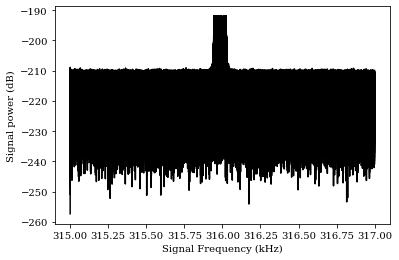

In [33]:
#  H1
plt.figure()
plt.plot(frequency_signal, H1_signal_power, color='black')
plt.xlabel('Signal Frequency (kHz)')
plt.ylabel('Signal power (dB)')
plt.show()

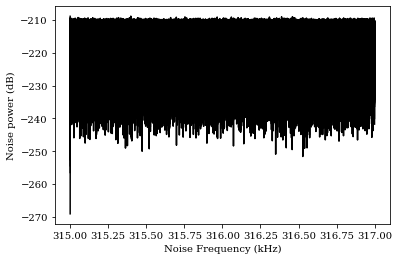

In [34]:
plt.figure()
plt.plot(frequency_noise, H1_noise_power, color='black')
plt.xlabel('Noise Frequency (kHz)')
plt.ylabel('Noise power (dB)')
plt.show()

# L1

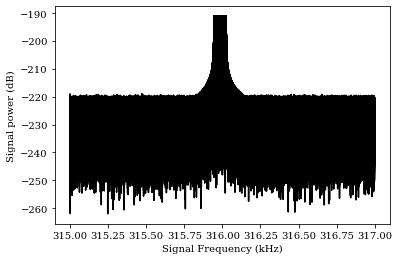

In [35]:
plt.figure()
plt.plot(frequency_signal, L1_signal_power, color='black')
plt.xlabel('Signal Frequency (kHz)')
plt.ylabel('Signal power (dB)')
plt.show()

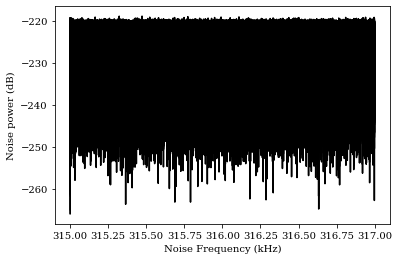

In [36]:
plt.figure()
plt.plot(frequency_noise, L1_noise_power, color='black')
plt.xlabel('Noise Frequency (kHz)')
plt.ylabel('Noise power (dB)')
plt.show()

# V1

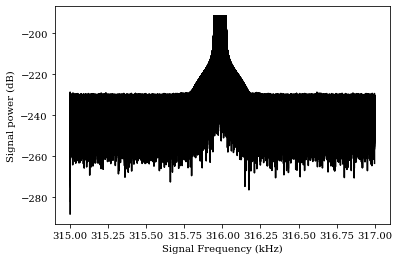

In [37]:
plt.figure()
plt.plot(frequency_signal, V1_signal_power, color='black')
plt.xlabel('Signal Frequency (kHz)')
plt.ylabel('Signal power (dB)')
plt.show()

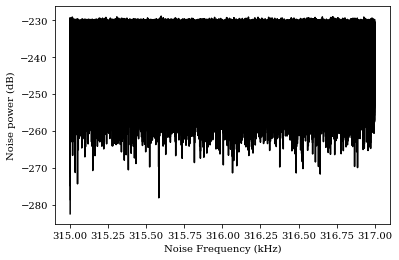

In [38]:

plt.figure()
plt.plot(frequency_noise, V1_noise_power, color='black')
plt.xlabel('Noise Frequency (kHz)')
plt.ylabel('Noise power (dB)')
plt.show()